# Data analysis

This notebook goes through the investigation of factors influencing college football attendance for my [final project of Data 512](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A7:_Final_project_report).

## Introduction

I have always been a huge college football fan so I wanted to do my project on something that I had a passion for, a domain knowledge in, and had a unique mix of quantitative and qualitative information. More specifically, I decided to look into factors influencing attendance at college football games. Attendance is important to the school's reputation, program funding and the gameday experience for fans. Since attendance has been declining lately, this is an important problem to solve, and one that has had many possible contributions addressed but no clear driver. Declining attendance is important to look at through a human-centered lense as it is mutually beneficial to all parties to solve. Human-centered research focuses on an audience, purpose and context (Week 1 Lecture Slides) and I believe this anlaysis clearly addresses all 3. This analysis can be used by those running college football programs to help boost attendance once they recognize what factors are most important to fans. The purpose is to boost attendance and the context is during NCAA college football games.

---------------------
## Background and related work
What other research has been done in this area? How does this research inform your hypotheses, your analysis, or your system design? 

College football attendance has been in the decline as of late so much research has been done to investigate what is causing this. Currently, attendance is in a [22-year low](https://techcrunch.com/2019/09/08/as-college-football-attendance-slumps-new-ways-to-ticket-may-hold-an-answer/) and the 2018 season was the [7th time in 8 year that attendance dropped](https://fanbuzz.com/college-football/cfb-attendance-2019/). Many reasons have been tossed around as the cause of this decline from the [use of cell phones](https://frntofficesport.com/college-football-attendance/), to [kickoff times](https://www.offtackleempire.com/2019/7/24/20707199/millennials-terrible-phones-pat-fitzgerald-college-football-attendance-decline-big-ten-media-days), to [dissatisfaction of students](https://ugawire.usatoday.com/2019/03/27/college-football-game-attendance-still-on-the-decline-why-whats-the-solution-how-does-it-relate-to-uga-football/), to a [decrease in stadium capacity due to a focus on more luxury seating](https://www.npr.org/2019/08/24/753962604/attendance-drops-for-college-football) and many more.

This discussion of dropping attendance intriqued me and is what led to me landing on attendance as my area of focus. While the data I have avaiable to me is mainly on game metrics, I decided to suppliment this with some weather information to get a better idea of the gameday experience for fans. 

My research question is: What factors influence attendance at college football games? My hypotheses are discussed in detail below.

--------------------------
## Methods 
Not just your analytical methods: also, why you chose them, and how human-centered considerations such as ethics informed the way you designed your study. ● Findings: What did you find? Use words and figures, don’t just point to code.

### Setup

This Jupyter Notebook is created using [Python version 3.7](https://www.python.org/downloads/release/python-370/).

First, I will import the necessary libraries to run the code. The following libraries are used:  
* [scipy](https://www.scipy.org/)  
* [math](https://docs.python.org/3/library/math.html) 
* [numpy 1.17.4](https://numpy.org/)  
* [pandas 0.25.3](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [21]:
from scipy.stats import sem
from scipy.stats import t
from scipy.stats import ttest_ind
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

We can increase the font size of matplotlib plots generated later in the notebook to 12 pt to improve clarity.

In [ ]:
plt.rcParams.update({'font.size': 12})

We can read in the csv generated in the data_collection notebook:

In [39]:
attendance_data_with_rain_data = pd.read_csv("processed_data/seasons_2012-2018_attendance_data.csv")

----------------

### What factors influenced attendance rates at College Football games over the 2012 - 2018 seasons?  

### *H1. Larger stadium capacities have higher percentages of attendance than stadiums that accommodate less people.*

I expected that larger stadiums would have higher attendance percentages than smaller stadiums. To examine this hypothesis, I will create two tables, one for the 5 smallest stadiums and one for the 5 largest stadiums. Then I can see if the larger stadiums seem to have higher attendance percentages.

To generate this 

In [4]:
stadiums = attendance_data_with_rain_data["name"].unique()
average_attendance_percentages = []
capacities = []

for stadium in stadiums:
    stadium_rows = attendance_data_with_rain_data[attendance_data_with_rain_data["name"] == stadium]
    average_attendance_percentage = np.mean(stadium_rows["attendance_percentage"])
    capacity = np.mean(stadium_rows["capacity"])
    capacities.append(capacity)
    average_attendance_percentages.append(average_attendance_percentage) 
    
average_attendance_data = pd.DataFrame()
average_attendance_data["name"] = stadiums
average_attendance_data["capacity"] = capacities
average_attendance_data["average_attendance_percentage"] = average_attendance_percentages

##### 5 largest stadiums, by capacity

In [47]:
largest_stadiums = average_attendance_data.nlargest(5, "capacity")
largest_stadiums["rank"] = [1, 2, 3, 4, 5]
largest_stadiums[["rank", "name", "capacity", "average_attendance_percentage"]].style.hide_index()

rank,name,capacity,average_attendance_percentage
1,Bristol Motor Speedway,162000,96.9074
2,Michigan Stadium,107601,102.308
3,Beaver Stadium,106572,94.2074
4,Ohio Stadium,104944,101.253
5,Kyle Field,102733,94.3094


##### 5 smallest stadiums, by capacity

In [48]:
smallest_stadiums = average_attendance_data.nsmallest(5, "capacity")
smallest_stadiums["rank"] = [1, 2, 3, 4, 5]
smallest_stadiums[["rank", "name", "capacity", "average_attendance_percentage"]].style.hide_index()

rank,name,capacity,average_attendance_percentage
1,Jerry Richardson Stadium,15314,86.1254
2,Kibbie Dome,16000,76.2361
3,Warren McGuirk Alumni Stadium,17000,69.4376
4,Foreman Field,20118,100.011
5,Houchens Industries-L. T. Smith Stadium,22113,77.8348


We can see that with the noteable exception of Foreman field, the larger stadiums have a higher average attendance percentage.

Likely due to program funding?

------------------------
### *H2. The higher the quality of the home team for the game week, the higher the percentage of attendance.*

I hypothesized that

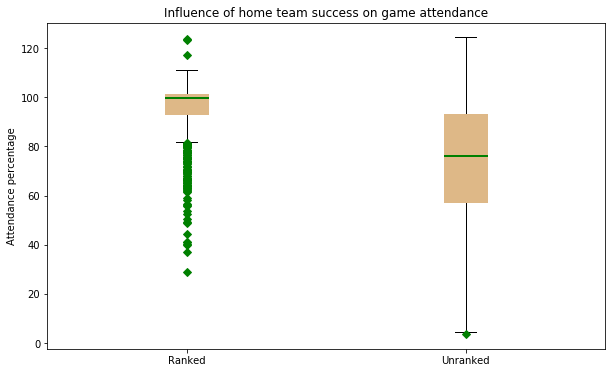

In [18]:
home_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 1]["attendance_percentage"]
home_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 0]["attendance_percentage"]

data = [home_team_ranked, home_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)
    
plt.ylabel("Attendance percentage")
plt.title("Influence of home team success on game attendance")
plt.savefig("home_team_rank.jpg")
plt.show()

In [8]:
t, p = ttest_ind(home_team_ranked, home_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.0,44.229969


--------------------
### *H3. The higher the quality of the away team for the game week, the higher the percentage of attendance.*

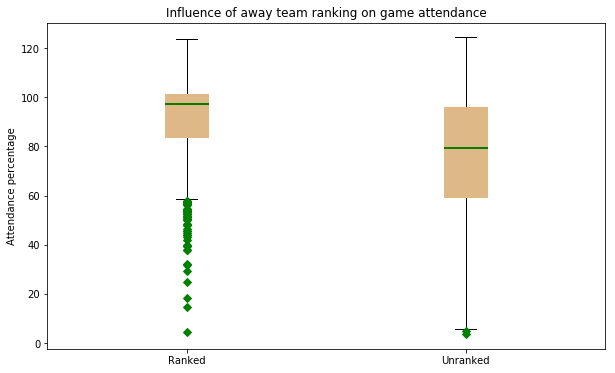

In [9]:
away_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 1]["attendance_percentage"]
away_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 0]["attendance_percentage"]

data = [away_team_ranked, away_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of away team ranking on game attendance")
plt.show()

In [10]:
t, p = ttest_ind(away_team_ranked, away_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,7.904206e-88,21.350052


---------------------
### *H4. Conference matchups have higher percentages of attendance than non-conference games.*

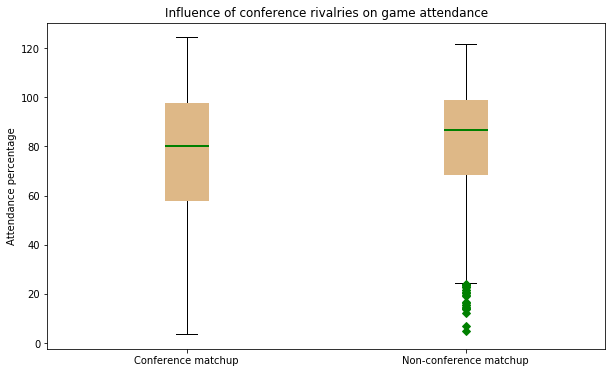

In [11]:
conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"]]["attendance_percentage"]
non_conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"] == False]["attendance_percentage"]

data = [conference_matchups, non_conference_matchups]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Conference matchup", "Non-conference matchup"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of conference rivalries on game attendance")
plt.show()

In [12]:
t, p = ttest_ind(conference_matchups, non_conference_matchups, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,3.167358e-17,-8.475536


--------------------------
### *H5. Games with a temperate kickoff temperature will have higher percentages of attendance than those with extremely high or extremely low temperatures.*

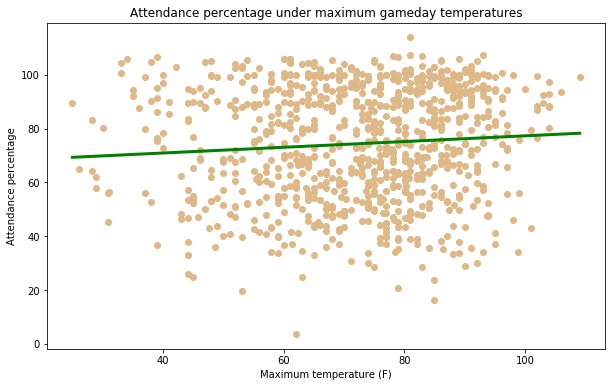

In [14]:
max_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["max_temp"] >= 0]

plt.figure(figsize=(10,6))
plt.plot(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], "o", color="burlywood")
plt.plot(np.unique(max_temp_attendance["max_temp"]), np.poly1d(np.polyfit(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], 1))(np.unique(max_temp_attendance["max_temp"])), color="green", linewidth=3)

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Maximum temperature (F)")
plt.savefig("temp_vs_attendance.jpg")
plt.show()

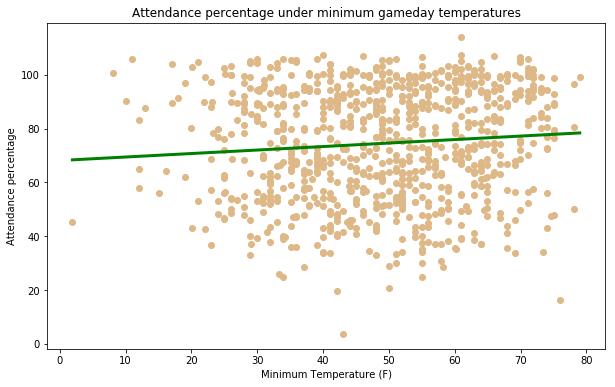

In [15]:
min_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["min_temp"] >= 0]

plt.figure(figsize=(10,6))
plt.plot(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], "o", color="burlywood")
plt.plot(np.unique(min_temp_attendance["min_temp"]), np.poly1d(np.polyfit(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], 1))(np.unique(min_temp_attendance["min_temp"])), color="green", linewidth=3)

plt.title("Attendance percentage under minimum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Minimum Temperature (F)")
plt.show()

-----------------------
### H6. *Games without rain will have higher percentages of attendance than those with rain.*

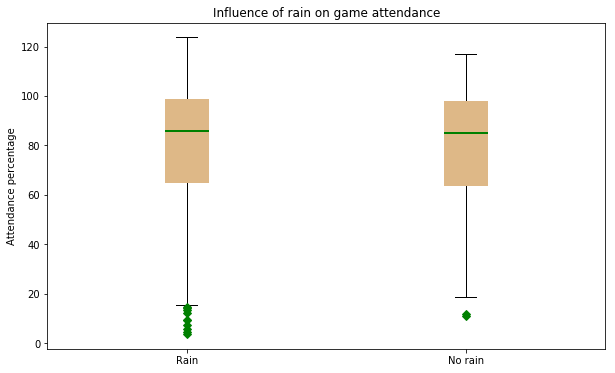

In [16]:
attendance_with_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] == 0]["attendance_percentage"]
attendance_without_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] > 0]["attendance_percentage"]

data = [attendance_with_rain, attendance_without_rain]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Rain", "No rain"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of rain on game attendance")
plt.show()

In [17]:
t, p = ttest_ind(attendance_with_rain, attendance_without_rain, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.664563,-0.433763


-------------------------

## Discussion and implications

There are still many factors to look at before a conclusion is reached regarding the cause of declining attendance. While my research suggests that team success and stadium capacity largely influence influence attendance, there is much more that should be looked at before athletic departments go out and build giant stadiums in an effort to improve attendance. This does however provide a starting place for future investigations.

This analysis fails to account for availability of internet inside the stadium, ease of stadium access, ticket price, and other factors that were discussed above as possible contributors to the attendance decline. I think future work could build on this study by bringing in more data with details such as game cost and commute data to create a more comprhensive view of the situations when attendance is high and what it is low. These findings could be turned over to conference commisioners, NCAA heads or program athletic directors to allow them to develop some actionable takeaways from the findings.

Additionally, this analysis only covers the 2012-2018 seasons. More work could be done to gather attendance data prior to 2012 which would allow more of a time series view to see how other variables have changed with attendance over time.

----------------

## Conclusion

Restate your research questions/hypotheses and summarize your findings; Explain to the reader how this study informs the their understanding of HCDS

To me, human-centered data science is about identifying factors that are important to people and use data science tecniques to make things better. In this case I think the decline of attendance can identify things that matter to fans and the athletic marketing apartment can use this to ??????????

-------------------

## References

All references are included as in-line linked citations.